In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Vectors

In [21]:
np.zeros(5)
np.ones(3)
np.random.random(5)

array([0.19520039, 0.48141911, 0.7483544 , 0.27239168, 0.36723681])

In [2]:
x = [1,2,3]
len(x)

3

In [7]:
x = np.array([1,2,3,4,5])
len(x)
x[-1]

5

In [8]:
y = x.copy()
y[2]

3

In [11]:
x = np.array([1,2,3])
y = np.array([1,2,3])
print(x == y) # this is elementwise on numpy array
print([1,2,3] == [1,2,3]) # this is total on list structure

[ True  True  True]
True


In [13]:
x = 2.4
y = [2.4]
print(x == y)
y = np.array([2.4])
print(x == y)

False
[ True]


In [36]:
# concatenate
x = np.array([1,-2])
y = np.array([1,1,0])
z = np.concatenate((x,y))
z

array([ 1, -2,  1,  1,  0])

In [37]:
s = np.concatenate([x,y])
s

array([ 1, -2,  1,  1,  0])

In [16]:
z[1:4]

array([-2,  1,  1])

In [18]:
x = np.array([1,3,4,6,2,3])
diff = x[1:] - x[:-1]
diff

array([ 2,  1,  2, -4,  1])

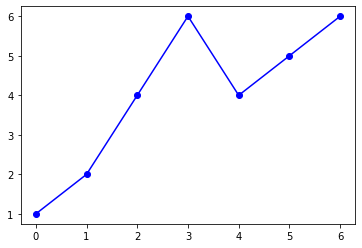

In [23]:
data = [1,2,4,6,4,5,6]
plt.plot(data, "-bo")
plt.show()

In [26]:
x = np.array([2,4,3])
y = np.array([1,5,3])
x + y
y/3

array([0.33333333, 1.66666667, 1.        ])

In [29]:
# inner product
x = np.random.random(3)
y = np.random.random(3)
#1
np.inner(x,y)
#2
x @ y

0.4593591742022385

In [30]:
x@y

0.4593591742022385

In [39]:
start = time.time()
a = np.random.random(10**5)
b = np.random.random(10**5)
a @ b
end = time.time()
print(end - start)

0.3540534973144531


In [43]:
# create sparse matrix
from scipy import sparse
I = np.array([3,5])
J = np.array([3,5])
V = np.array([9,21])
sparse.coo_matrix((V,(I,J)),shape = (10,6))

<10x6 sparse matrix of type '<class 'numpy.int32'>'
	with 2 stored elements in COOrdinate format>

# Linear Functions

In [44]:
f = lambda x: x[0]*x[1]
f([1,2,3])

2

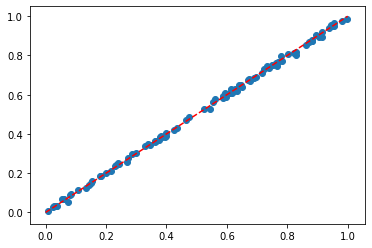

In [46]:
x = np.random.random(100)
y = x + np.random.randn(100)*0.01
plt.scatter(x, y)
plt.plot((0,1), (0,1), ls="--", c="r")

# Norm and distance

In [49]:
# calculate the norm
x = np.array([2,1,-2])
#1
np.linalg.norm(x)
#2
np.sqrt(np.inner(x,x))
#3
sum(x**2)**0.5

3.0

In [50]:
# calculate distance
u = np.array([1,2,3])
v = np.array([2,3,4])
np.linalg.norm(u - v)

1.7320508075688772

In [51]:
# search for nearest neighbor
z = ([2,1],[7,2],[3,4],[4,8],[1,5])
x = np.array([5,6])
near_neighbor = lambda x,z: z[np.argmin([np.linalg.norm(x-y) for y in z])]
near_neighbor(x,z)

[4, 8]

# clustering

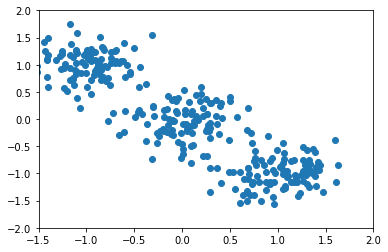

In [8]:
X = np.concatenate([[0.3*np.random.randn(2) for i in range(100)],
                    [[-1,1] + 0.3*np.random.randn(2) for i in range(100)],
                    [[1,-1] + 0.3*np.random.randn(2) for i in range(100)]
                   ])
plt.scatter(X[:,0],X[:,1])
plt.xlim(-1.5,2,5)
plt.ylim(-2,2)
plt.show()

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0).fit(X)
labels = kmeans.labels_
group_representative = kmeans.cluster_centers_
J_clust = kmeans.inertia_

In [11]:
grps = [[X[i,:] for i in range(300) if labels[i]==j] for j in range(3)]

In [14]:
len(grps[0])

101

# Matrix

In [16]:
a = [1,2]
b = [2,3]
c = [3,4]
np.vstack([a,b,c])
np.hstack([a,b,c])

array([1, 2, 2, 3, 3, 4])

In [18]:
np.c_[np.identity(5),np.zeros(5)]

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [19]:
np.r_[np.identity(5),np.zeros((2,5))]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [20]:
np.diag([2,1,3])

array([[2, 0, 0],
       [0, 1, 0],
       [0, 0, 3]])

In [21]:
# uniform matrix
np.random.random((2,3))

array([[0.22651314, 0.71039396, 0.24592177],
       [0.46742541, 0.88892479, 0.23975127]])

In [24]:
A = np.random.randn(3,2)

In [26]:
A.T == np.transpose(A)

array([[ True,  True,  True],
       [ True,  True,  True]])

In [27]:
A = np.random.random((2,3))
B = np.random.random((3,1))

In [31]:
A @ B == np.matmul(A,B)

array([[ True],
       [ True]])

In [32]:
a = np.array([1,1]) # coefficients 1 + x
b = np.array([2,-1,1]) # coeff  2-x+x^2
np.convolve(a,b) # coeff of product

array([2, 1, 0, 1])